<h1> The Battle of the Neighborhoods </h1>

Safest Neighborhood for opening of commercial establishments  Vancouver.

### Table of contents

* Introduction: Business Problem 
* Data
* Methodology
* Importing Libraries
* Data Analysis
* Results and Discussion 
* Conclusion

### Introduction: Business Problem

* The aim of this project is to find a safe and secure location for opening of commercial establishments in Vancouver, Canada. Specifically, this report will be targeted to stakeholders interested in opening any business place like Grocery Store in Vancouver City, Canada.

* The first task would be to choose the safest borough by analysing crime data for opening a grocery store and short listing a neighbourhood, where grocery stores are not amongst the most commom venues, and yet as close to the city as possible.

* We will make use of our data science tools to analyse data and focus on the safest borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood where grocery store is not amongst the most common venue can be selected.


### Data

Based on definition of our problem, factors that will influence our decission are:
 * finding the safest borough based on crime statistics
 * finding the most common venues
 * choosing the right neighbourhood within the borough


We will be using the geographical coordinates of Vancouver to plot neighbourhoods in a borough that is safe and in the city's vicinity, and finally cluster our neighborhoods and present our findings.


* Part 1: 
Using a real world data the Vancouver Crimes from 2003 to 2019: A dataset consisting of the crime statistics of each Neighbourhoof in Vancouver along with type of crime, recorded year, month and hour.

* Part 2: 
Gathering additional information of the list of officially categorized boroughs in Vancouver from Wikipedia.: Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

* Part 3: 
Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.: This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium and perform exploratory data analysis.

* Part 4: 
Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.: This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

### Methodology

Categorized the methodology section into two parts:

* Exploratory Data Analysis: Visualise the crime repots in different Vancouver boroughs to idenity the safest borough and normalise the neighborhoods of that borough. We will Use the resulting data and find 10 most common venues in each neighborhood.

* Modelling: To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process

### Importing Libraries

In [3]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

from opencage.geocoder import OpenCageGeocode

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium
import requests

from pandas.io.json import json_normalize

from sklearn.cluster import KMeans

print('Libraries Imported')

Libraries Imported


### Vancouver Crimes Dataset Description

#### Part 1
Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019

#### Vancouver Crime Report
Properties of the Crime Report

* TYPE - Crime type 
* YEAR - Recorded year
* MONTH - Recorded month
* DAY - Recorded day
* HOUR - Recorded hour
* MINUTE - Recorded minute
* HUNDRED_BLOCK - Recorded block
* NEIGHBOURHOOD - Recorded neighborhood
* X - GPS longtitude
* Y - GPS latitude

Data set URL: https://github.com/Mick-fr/Coursera_Capstone/blob/master/VancouverCrimeRecords.zip


#### Reading real world data set Vancouver Crimes

In [6]:
vnc_crime_df = pd.read_csv('VancouverCrimeRecords.csv')

vnc_crime_df.drop(['MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis=1, inplace=True)

vnc_crime_df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2012,12,14,8,Oakridge
1,Break and Enter Commercial,2019,3,7,2,Fairview
2,Break and Enter Commercial,2019,8,27,4,West End
3,Break and Enter Commercial,2014,8,8,5,West End
4,Break and Enter Commercial,2005,11,14,3,West End


In [7]:
vnc_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood']
vnc_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2012,12,14,8,Oakridge
1,Break and Enter Commercial,2019,3,7,2,Fairview
2,Break and Enter Commercial,2019,8,27,4,West End
3,Break and Enter Commercial,2014,8,8,5,West End
4,Break and Enter Commercial,2005,11,14,3,West End


#### Total Crimes in different Neighborhoods

In [8]:
vnc_crime_df['Neighbourhood'].value_counts()

Central Business District    137513
West End                      48722
Fairview                      36723
Mount Pleasant                36378
Grandview-Woodland            31599
Renfrew-Collingwood           31097
Kitsilano                     30670
Kensington-Cedar Cottage      28418
Strathcona                    25809
Hastings-Sunrise              21272
Sunset                        19686
Marpole                       15137
Riley Park                    14663
Victoria-Fraserview           12310
Killarney                     11847
Oakridge                       9281
Dunbar-Southlands              8792
Kerrisdale                     8470
Arbutus Ridge                  6819
West Point Grey                6761
Shaughnessy                    6321
South Cambie                   6043
Stanley Park                   4174
Musqueam                        571
Name: Neighbourhood, dtype: int64

#### Part 2: Gathering additional information about the Neighborhood from Wikipedia

In [9]:
columns_names = ['Neighbourhood', 'Borough']

vnc_neigh_bor = pd.DataFrame(columns=columns_names)

vnc_neigh_bor['Neighbourhood'] = vnc_crime_df['Neighbourhood'].unique()

neigh_bor_dict  = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, vnc_neigh_bor['Neighbourhood']):
    vnc_neigh_bor.loc[vnc_neigh_bor['Neighbourhood'] == row, 'Borough'] = neigh_bor_dict.get(row)

vnc_neigh_bor.dropna(inplace=True)

print('Total Neighbourhood Count', len(vnc_neigh_bor['Neighbourhood']), 
      " Borough Count : ", len(vnc_neigh_bor['Borough'].unique()))

vnc_neigh_bor.head()

Total Neighbourhood Count 24  Borough Count :  4


,Neighbourhood,Borough
0,Oakridge,West Side
1,Fairview,West Side
2,West End,Central
3,Central Business District,Central
4,Hastings-Sunrise,East Side


#### Merging the Crime data Table to include Boroughs

In [10]:
vnc_boroughs_crime = pd.merge(vnc_crime_df, vnc_neigh_bor, on='Neighbourhood')

vnc_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2012,12,14,8,Oakridge,West Side
1,Break and Enter Commercial,2008,10,23,17,Oakridge,West Side
2,Break and Enter Commercial,2006,12,9,23,Oakridge,West Side
3,Break and Enter Commercial,2010,12,4,3,Oakridge,West Side
4,Break and Enter Commercial,2011,5,28,14,Oakridge,West Side


In [11]:

vnc_boroughs_crime.dropna(inplace=True)
vnc_boroughs_crime['Borough'].value_counts()

East Side          208922
Central            190409
West Side          135017
South Vancouver     24728
Name: Borough, dtype: int64

#### Exploratory Data Analysis

In [12]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                              values=['Year'],
                              index=['Borough'],
                              columns=['Type'],
                              aggfunc=len,
                              fill_value=0,
                              margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                              14195                              7546   
East Side                            14314                             29165   
South Vancouver                        814                              5018   
West Side                             9590                             24646   
All                                  38913                             66375   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central            27577       31641              84552            12157   
East Side          34447       21443              67366             9416   
South Vancouver     4117         957               8864              388   
West Side          17529       10565              46856             9016   
All                83670       64606             207638            30977   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                     7373   
East Side                  20967   
South Vancouver             2896   
West Side                  10214   
All                        41450   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                         59       
East Side                                                      126       
South Vancouver                                                 26       
West Side                                                       76       
All                                                            287       

                                                                              
Type            Vehicle Collision or Pedestrian Struck (with Injury)     All  
Borough                                                                       
Central                                                       5309    190409  
East Side                                                    11678    208922  
South Vancouver                                               1648     24728  
West Side                                                     6525    135017  
All                                                          25160    559076

#### Merging the Pivoted Column with other columns

In [13]:
vnc_crime_cat.reset_index(inplace=True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll': 'Total'}, inplace=True)
vnc_crime_cat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,14195,7546,27577,31641,84552,12157,7373,59,5309,190409
1,East Side,14314,29165,34447,21443,67366,9416,20967,126,11678,208922
2,South Vancouver,814,5018,4117,957,8864,388,2896,26,1648,24728
3,West Side,9590,24646,17529,10565,46856,9016,10214,76,6525,135017
4,All,38913,66375,83670,64606,207638,30977,41450,287,25160,559076


#### Pivoting the table to better understand the data by crimes per neighborhood¶

In [14]:
vnc_crime_neigh = pd.pivot_table(vnc_boroughs_crime,
                                values=['Year'],
                                index=['Neighbourhood'],
                                columns=['Type'],
                                aggfunc=len,
                                fill_value=0,
                                margins=True)
vnc_crime_neigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                    352   
Central Business District                      10799   
Dunbar-Southlands                                316   
Fairview                                        3717   
Grandview-Woodland                              2426   
Hastings-Sunrise                                1036   
Kensington-Cedar Cottage                        1434   
Kerrisdale                                       384   
Killarney                                        375   
Kitsilano                                       2330   
Marpole                                         1222   
Mount Pleasant                                  3278   
Musqueam                                          18   
Oakridge                                         383   
Renfrew-Collingwood                             1369   
Riley Park                                       954   
Shaughnessy                                      157   
South Cambie                                     364   
Stanley Park                                      92   
Strathcona                                      2580   
Sunset                                          1237   
Victoria-Fraserview                              421   
West End                                        3304   
West Point Grey                                  365   
All                                            38913   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                          1848     1041   
Central Business District                              3827    20878   
Dunbar-Southlands                                      2056     1490   
Fairview                                               4023     3797   
Grandview-Woodland                                     4892     5750   
Hastings-Sunrise                                       3500     3404   
Kensington-Cedar Cottage                               4468     4402   
Kerrisdale                                             2080     1186   
Killarney                                              2263     1986   
Kitsilano                                              4758     4313   
Marpole                                                2798     2205   
Mount Pleasant                                         3583     4893   
Musqueam                                                 92      112   
Oakridge                                               2384     1028   
Renfrew-Collingwood                                    4645     4507   
Riley Park                                             3002     2090   
Shaughnessy                                            2040      730   
South Cambie                                           1224      708   
Stanley Park                                             70      279   
Strathcona                                             2312     5773   
Sunset                                                 2763     3628   
Victoria-Fraserview                                    2663     2019   
West End                                               3649     6420   
West Point Grey                                        1435     1031   
All                                                   66375    83670   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                     386               2120              209   
Central Business District       24367              61019             8455   
Dunbar-Southlands                 310               3353              289   


#### Merging the Pivoted Column with other columns

In [15]:
vnc_crime_neigh.reset_index(inplace=True)
vnc_crime_neigh.columns = vnc_crime_neigh.columns.map(''.join)
vnc_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

vnc_crime_neigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,352,1848,1041,386,2120,209,525,4,334,6819
1,Central Business District,10799,3827,20878,24367,61019,8455,4412,45,3711,137513
2,Dunbar-Southlands,316,2056,1490,310,3353,289,656,4,318,8792
3,Fairview,3717,4023,3797,4013,13701,3974,2166,14,1318,36723
4,Grandview-Woodland,2426,4892,5750,3051,8964,1687,3433,10,1386,31599


In [16]:
vnc_crime_cat.describe()

,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,15565.200000,26550.000000,33468.000000,25842.400000,83055.200000,12390.800000,16580.000000,114.80000,10064.000000,223630.400000
std,14158.598366,24603.216792,30296.188077,24537.100742,75139.839135,11289.457591,15413.543801,102.81391,9171.393215,200784.865212
min,814.000000,5018.000000,4117.000000,957.000000,8864.000000,388.000000,2896.000000,26.00000,1648.000000,24728.000000
25%,9590.000000,7546.000000,17529.000000,10565.000000,46856.000000,9016.000000,7373.000000,59.00000,5309.000000,135017.000000
50%,14195.000000,24646.000000,27577.000000,21443.000000,67366.000000,9416.000000,10214.000000,76.00000,6525.000000,190409.000000
75%,14314.000000,29165.000000,34447.000000,31641.000000,84552.000000,12157.000000,20967.000000,126.00000,11678.000000,208922.000000
max,38913.000000,66375.000000,83670.000000,64606.000000,207638.000000,30977.000000,41450.000000,287.00000,25160.000000,559076.000000


#### Exploring the data by Visualising

In [17]:
vnc_crime_neigh.sort_values(['Total'], ascending=False, axis=0, inplace=True)

vnc_crime_neigh

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
24,All,38913,66375,83670,64606,207638,30977,41450,287,25160,559076
1,Central Business District,10799,3827,20878,24367,61019,8455,4412,45,3711,137513
22,West End,3304,3649,6420,7256,20401,3449,2881,8,1354,48722
3,Fairview,3717,4023,3797,4013,13701,3974,2166,14,1318,36723
11,Mount Pleasant,3278,3583,4893,4857,11703,3325,2881,18,1840,36378
4,Grandview-Woodland,2426,4892,5750,3051,8964,1687,3433,10,1386,31599
14,Renfrew-Collingwood,1369,4645,4507,5141,10024,520,3249,13,1629,31097
9,Kitsilano,2330,4758,4313,2129,10550,2886,2502,14,1188,30670
6,Kensington-Cedar Cottage,1434,4468,4402,3305,8870,1050,3108,17,1764,28418
19,Strathcona,2580,2312,5773,1252,9349,1288,1888,23,1344,25809


#### Neighborhoods with highest crime

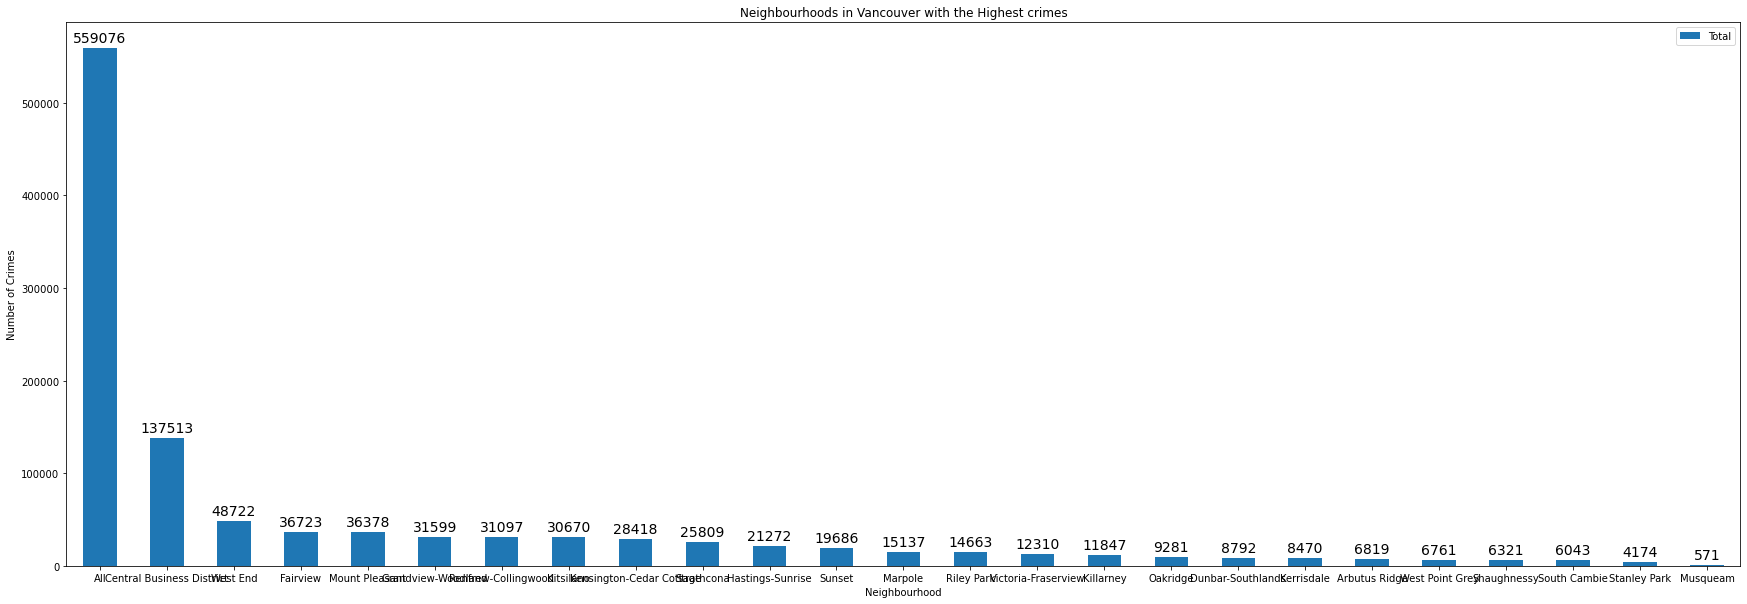

In [18]:
per_neigh = vnc_crime_neigh[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(30, 10), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### Borough is Vancouver with Highest Crime

In [19]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                              values=['Year'],
                              index=['Borough'],
                              columns=['Type'],
                              aggfunc=len,
                              fill_value=0,
                              margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                              14195                              7546   
East Side                            14314                             29165   
South Vancouver                        814                              5018   
West Side                             9590                             24646   
All                                  38913                             66375   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central            27577       31641              84552            12157   
East Side          34447       21443              67366             9416   
South Vancouver     4117         957               8864              388   
West Side          17529       10565              46856             9016   
All                83670       64606             207638            30977   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                     7373   
East Side                  20967   
South Vancouver             2896   
West Side                  10214   
All                        41450   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                         59       
East Side                                                      126       
South Vancouver                                                 26       
West Side                                                       76       
All                                                            287       

                                                                              
Type            Vehicle Collision or Pedestrian Struck (with Injury)     All  
Borough                                                                       
Central                                                       5309    190409  
East Side                                                    11678    208922  
South Vancouver                                               1648     24728  
West Side                                                     6525    135017  
All                                                          25160    559076

In [20]:
vnc_crime_cat.reset_index(inplace=True)
vnc_crime_cat.columns=vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)

vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,14195,7546,27577,31641,84552,12157,7373,59,5309,190409
1,East Side,14314,29165,34447,21443,67366,9416,20967,126,11678,208922
2,South Vancouver,814,5018,4117,957,8864,388,2896,26,1648,24728
3,West Side,9590,24646,17529,10565,46856,9016,10214,76,6525,135017
4,All,38913,66375,83670,64606,207638,30977,41450,287,25160,559076


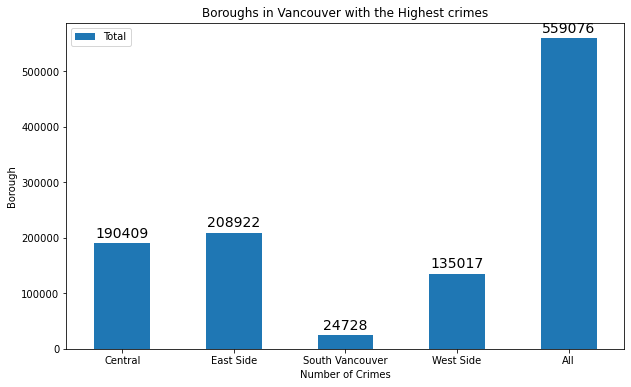

In [21]:
per_borough = vnc_crime_cat[['Borough','Total']]

per_borough.set_index('Borough', inplace=True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Borough')
ax.set_title('Boroughs in Vancouver with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2),
                (p.get_x()+p.get_width()/2.0, p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )
plt.show()

#### Different types of crimes recorded in the West Side Borough

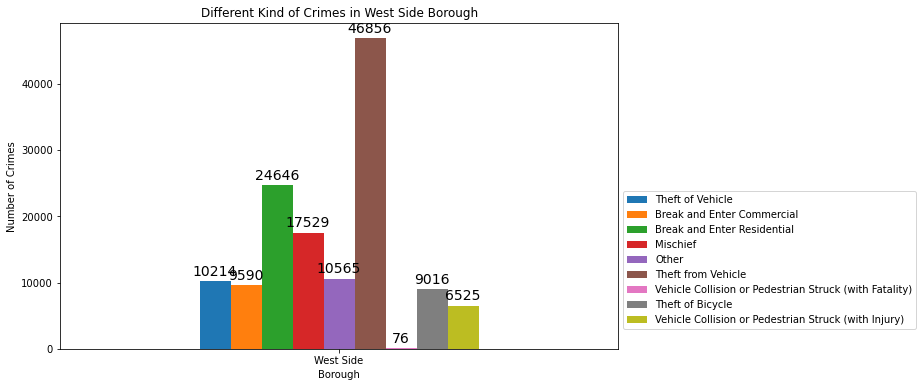

In [22]:
vnc_ws_df = vnc_crime_cat[vnc_crime_cat['Borough'] == 'West Side']

vnc_ws_df = vnc_ws_df.sort_values(['Total'], ascending = True, axis = 0)

vnc_ws = vnc_ws_df[['Borough','Theft of Vehicle', 'Break and Enter Commercial','Break and Enter Residential','Mischief','Other',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]


vnc_ws.set_index('Borough',inplace = True)

ax = vnc_ws.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

#### Part 3: Creating a new consolidated dataset of the Neighborhoods, along with their boroughs, crime data and the respective Neighbourhood's co-ordinates.

In [23]:

vnc_ws_neigh = vnc_boroughs_crime

vnc_ws_neigh = vnc_ws_neigh[vnc_ws_neigh['Borough'] == 'West Side']
vnc_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vnc_ws_neigh['Neighbourhood'].unique()))

vnc_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Oakridge', 'Fairview', 'Kitsilano', 'Shaughnessy', 'Marpole',
       'West Point Grey', 'Kerrisdale', 'Arbutus Ridge',
       'Dunbar-Southlands', 'South Cambie'], dtype=object)

#### Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [24]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neigh['Neighbourhood'].unique()



key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

[49.2308288, 49.2641128, 49.2694099, 49.2518626, 49.2092233, 49.2644843, 49.2346728, 49.2409677, 49.2534601, 49.2466847] [-123.1311342, -123.1268352, -123.155267, -123.1380226, -123.1361495, -123.1854326, -123.1553893, -123.1670008, -123.1850439, -123.120915]


In [25]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Oakridge,West Side,49.230829,-123.131134
1,Fairview,West Side,49.264113,-123.126835
2,Kitsilano,West Side,49.269410,-123.155267
3,Shaughnessy,West Side,49.251863,-123.138023
4,Marpole,West Side,49.209223,-123.136150
5,West Point Grey,West Side,49.264484,-123.185433
6,Kerrisdale,West Side,49.234673,-123.155389
7,Arbutus Ridge,West Side,49.240968,-123.167001
8,Dunbar-Southlands,West Side,49.253460,-123.185044
9,South Cambie,West Side,49.246685,-123.120915


#### Fetching the Geographical co-ordiantes of Vancouver to plot on Map

In [26]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


#### Using Folium to plot Vancouver City's West Side Borough and it's

In [27]:
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map

#### Part 4: Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.

(Put your informations)

In [55]:
CLIENT_ID = 'ID'
CLIENT_SECRET = 'SECRET'
VERSION = '20191101'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ID
CLIENT_SECRET:SECRET


#### Defining a function to fetch top 10 venues around a given neighborhood

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

#### Generating Venues

In [30]:
vnc_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Oakridge
Fairview
Kitsilano
Shaughnessy
Marpole
West Point Grey
Kerrisdale
Arbutus Ridge
Dunbar-Southlands
South Cambie


#### Data frame containing venues for each neighborhood in West Side

In [31]:
print(vnc_ws_venues.shape)
vnc_ws_venues.head()

(232, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Oakridge,49.230829,-123.131134,Sushi Mura,Sushi Restaurant
1,Oakridge,49.230829,-123.131134,A&W,Fast Food Restaurant
2,Oakridge,49.230829,-123.131134,7-Eleven,Convenience Store
3,Oakridge,49.230829,-123.131134,Subway,Sandwich Place
4,Oakridge,49.230829,-123.131134,Phò Hōa,Vietnamese Restaurant


#### Venue Count per neighborhood

In [32]:
vnc_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,5
Dunbar-Southlands,6
Fairview,27
Kerrisdale,39
Kitsilano,48
Marpole,32
Oakridge,7
Shaughnessy,2
South Cambie,18


In [33]:
print('There are {} uniques categories.'.format(len(vnc_ws_venues['Venue Category'].unique())))

There are 92 uniques categories.


### Modelling

#### One Hot Encoding to Analyze Each Neighborhood

In [34]:
vnc_onehot = pd.get_dummies(vnc_ws_venues[['Venue Category']], prefix="", prefix_sep="")

vnc_onehot['Neighbourhood'] = vnc_ws_venues['Neighbourhood'] 

fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1])
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio
0,Oakridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Oakridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Oakridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Oakridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Oakridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
vnc_onehot.shape

(232, 93)

In [36]:
vnc_ws_grouped = vnc_onehot.groupby('Neighbourhood').mean().reset_index()
vnc_ws_grouped

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bookstore,...,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.000000,0.074074,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000
3,Kerrisdale,0.000000,0.000000,0.025641,0.000000,0.025641,0.025641,0.000000,0.000000,0.000000,...,0.051282,0.000000,0.025641,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000
4,Kitsilano,0.041667,0.000000,0.020833,0.000000,0.083333,0.000000,0.000000,0.020833,0.000000,...,0.020833,0.020833,0.041667,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.020833
5,Marpole,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.031250,0.000000,0.000000,...,0.000000,0.000000,0.031250,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000
6,Oakridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
7,Shaughnessy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
9,West Point Grey,0.000000,0.020833,0.020833,0.000000,0.020833,0.020833,0.020833,0.000000,0.041667,...,0.000000,0.000000,0.000000,0.020833,0.041667,0.000000,0.000000,0.020833,0.020833,0.020833


In [37]:
vnc_ws_grouped.shape

(10, 93)

#### Top 5 most common venues across neighborhoods

In [56]:
num_top_venues = 5

for hood in vnc_ws_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vnc_ws_grouped[vnc_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
            venue  freq
0   Grocery Store   0.2
1          Bakery   0.2
2  Nightlife Spot   0.2
3             Spa   0.2
4       Pet Store   0.2


----Dunbar-Southlands----
                venue  freq
0         Coffee Shop  0.17
1  Italian Restaurant  0.17
2   Indian Restaurant  0.17
3      Ice Cream Shop  0.17
4    Sushi Restaurant  0.17


----Fairview----
                 venue  freq
0          Coffee Shop  0.15
1     Asian Restaurant  0.07
2                 Park  0.07
3           Nail Salon  0.04
4  Szechuan Restaurant  0.04


----Kerrisdale----
                venue  freq
0         Coffee Shop  0.10
1  Chinese Restaurant  0.08
2      Sandwich Place  0.05
3            Pharmacy  0.05
4    Sushi Restaurant  0.05


----Kitsilano----
                 venue  freq
0               Bakery  0.08
1  American Restaurant  0.04
2     Sushi Restaurant  0.04
3       Ice Cream Shop  0.04
4  Japanese Restaurant  0.04


----Marpole----
                   venue  freq
0       Sushi

#### Create the new dataframe and display the top 10 venues for each neighborhood

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vnc_ws_grouped['Neighbourhood']

for ind in np.arange(vnc_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Gas Station,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant
1,Dunbar-Southlands,Sushi Restaurant,Indian Restaurant,Sporting Goods Shop,Ice Cream Shop,Coffee Shop,Italian Restaurant,Hobby Shop,Cosmetics Shop,Deli / Bodega,Dessert Shop
2,Fairview,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
3,Kerrisdale,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Tea Room,Sushi Restaurant,Café,Hobby Shop,Portuguese Restaurant,Convenience Store
4,Kitsilano,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Ice Cream Shop,Sushi Restaurant,Food Truck,French Restaurant,Thai Restaurant,Clothing Store


#### Cluster Neighbourhoods

In [41]:
kclusters = 5

vnc_grouped_clustering = vnc_ws_grouped.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

kmeans.labels_[0:10]

array([3, 2, 0, 0, 0, 0, 4, 1, 0, 0], dtype=int32)

In [42]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = ws_neig_geo

vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Oakridge,West Side,49.230829,-123.131134,4,Sushi Restaurant,Vietnamese Restaurant,Sandwich Place,Pharmacy,Park,Fast Food Restaurant,Convenience Store,Food Truck,Deli / Bodega,Dessert Shop
1,Fairview,West Side,49.264113,-123.126835,0,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
2,Kitsilano,West Side,49.269410,-123.155267,0,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Ice Cream Shop,Sushi Restaurant,Food Truck,French Restaurant,Thai Restaurant,Clothing Store
3,Shaughnessy,West Side,49.251863,-123.138023,1,Park,French Restaurant,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck
4,Marpole,West Side,49.209223,-123.136150,0,Sushi Restaurant,Dessert Shop,Japanese Restaurant,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Bus Stop,Liquor Store,Bubble Tea Shop,Plaza


#### Create Clustered map

In [43]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1

In [44]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Coffee Shop,Park,Asian Restaurant,Malay Restaurant,Pharmacy,Chinese Restaurant,Diner,Nail Salon,Falafel Restaurant,Restaurant
2,West Side,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Ice Cream Shop,Sushi Restaurant,Food Truck,French Restaurant,Thai Restaurant,Clothing Store
4,West Side,Sushi Restaurant,Dessert Shop,Japanese Restaurant,Vietnamese Restaurant,Pizza Place,Chinese Restaurant,Bus Stop,Liquor Store,Bubble Tea Shop,Plaza
5,West Side,Coffee Shop,Japanese Restaurant,Café,Bookstore,Pub,Sporting Goods Shop,Sushi Restaurant,Bus Station,Pizza Place,Vegetarian / Vegan Restaurant
6,West Side,Coffee Shop,Chinese Restaurant,Sandwich Place,Pharmacy,Tea Room,Sushi Restaurant,Café,Hobby Shop,Portuguese Restaurant,Convenience Store
9,West Side,Coffee Shop,Bus Stop,Shopping Mall,Cafeteria,Café,Sushi Restaurant,Grocery Store,Park,Liquor Store,Bank


#### Cluster 2

In [45]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,West Side,Park,French Restaurant,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck


#### Cluster 3

In [46]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,West Side,Sushi Restaurant,Indian Restaurant,Sporting Goods Shop,Ice Cream Shop,Coffee Shop,Italian Restaurant,Hobby Shop,Cosmetics Shop,Deli / Bodega,Dessert Shop


#### Cluster 4

In [47]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,West Side,Nightlife Spot,Bakery,Pet Store,Grocery Store,Spa,Gas Station,Dessert Shop,Dim Sum Restaurant,Diner,Falafel Restaurant


#### Cluster 5

In [48]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Sushi Restaurant,Vietnamese Restaurant,Sandwich Place,Pharmacy,Park,Fast Food Restaurant,Convenience Store,Food Truck,Deli / Bodega,Dessert Shop


<h2>Results and Discussion</h2>

The objective of the business problem was to help stakeholders identify one of the safest borough in Vancouver, and an appropriate neighborhood within the borough to set up a commercial establishment especially a Grocery store. This has been achieved by first making use of Vancouver crime data to identify a safe borugh with considerable number of neighborhood for any business to be viable. After selecting the borough it was imperative to choose the right neighborhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighborhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.

<h2>Conslusion</h2>

We have explored the crime data to understand different types of crimes in all neighborhoods of Vancouver and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.